In [13]:
import paramiko
import sys
import os
import pickle
sys.path.append(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project')

from execute_remote_scripts import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
remote_script_path = "/home/tost/remote_processing_aggregated.py"
local_script_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts/remote_processing_aggregated.py"
result_file = "all_JET_data_first_10.pkl"

# Execute the remote script and retrieve the results
processed_data = execute_remote_script_download(local_script_path, remote_script_path, result_file)
print(processed_data)

SFTP session established!
Uploaded C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts/remote_processing_aggregated.py to /home/tost/remote_processing_aggregated.py
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno80331.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno80821.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno80822.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno80823.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno80824.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno80911.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno80962.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno80976.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno81197.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno81200.mat
Data saved to all_JET_data_first_10.pkl
Aggregated Pickle file created: all_JET_data_first_10.pkl

/usr/lib64/python2.7/site-packages/scipy/io/matlab/mio.py:132: MatRead

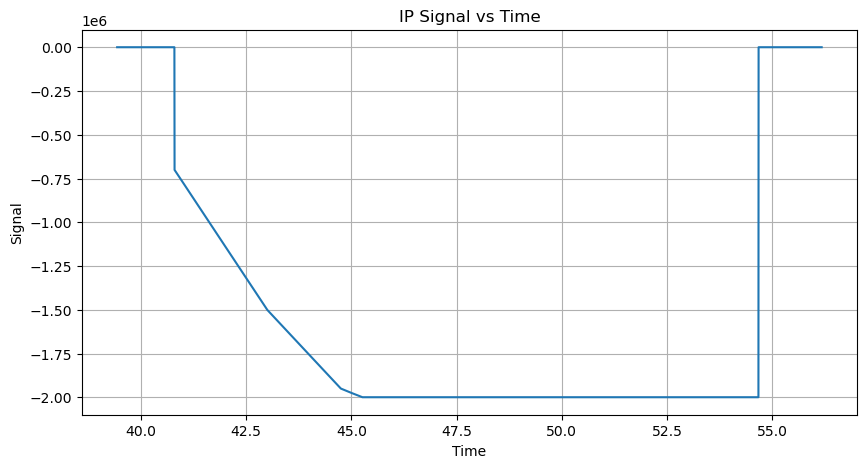

In [36]:
n = 0  # Index of key to plot
shot = -1  # Index of shot to plot

pickle_file_name = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\all_JET_data_first_10.pkl"  # Example Pickle file name
data = load_pickle(pickle_file_name)
shot_data = data[list(data.keys())[shot]]
keys_jet = ['IP', 'WMHD', 'RNT', 'DAI_EDG7']
plot_data(shot_data, keys_jet[n])

In [32]:
data[list(data.keys())[shot]]['WMHD']

{'signal': array([-1., -1., -1., ..., -1., -1., -1.]),
 'time': array([39.4372, 39.4392, 39.4412, ..., 58.6532, 58.6552, 58.6572])}

## Installing extensions on server

In [ ]:
# Define the paths for the check script
remote_script_path = "/home/tost/check_extensions.py"
local_script_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\check_extensions.py"

# Execute the remote script to check for necessary extensions
execute_remote_script(local_script_path, remote_script_path)

In [ ]:
# Define the paths for the install script
remote_script_path = "/home/tost/install_packages.py"
local_script_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\install_packages.py"

# Execute the remote script to install the missing packages
execute_remote_script(local_script_path, remote_script_path)